In [1]:
import torchaudio
from preprocessing import Preprocessing, SplitAudio, Reconstruction
from torchaudio.transforms import Resample, MelSpectrogram, InverseMelScale, GriffinLim
import matplotlib.pyplot as plt
from IPython.display import Audio

c:\Users\jpeir\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [2]:
audio_path = "./MusicCaps/_0-2meOf9qY.wav"
waveform, samp_rt = torchaudio.load(audio_path)
smpl_rt_reduce = 16000
f, s = SplitAudio(waveform, sample_rate = samp_rt, new_sample_rate = smpl_rt_reduce)
Audio(waveform.numpy(), rate = samp_rt, autoplay=True)

In [3]:
Audio(f.numpy(), rate = smpl_rt_reduce, autoplay=True)

In [17]:
Audio(s.numpy(), rate = smpl_rt_reduce)

torch.Size([256, 256])


c:\Users\jpeir\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchaudio\functional\functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (256) may be set too high. Or, the value for `n_freqs` (513) may be set too low.
  warnings.warn(


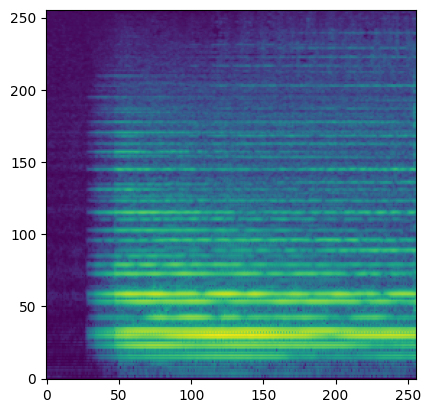

In [4]:
f_spec, f_maxi, f_mini = Preprocessing(f, 16000, resampler_f = False)
print(f_spec.shape)
plt.imshow(f_spec,origin='lower')

torch.Size([256, 256])


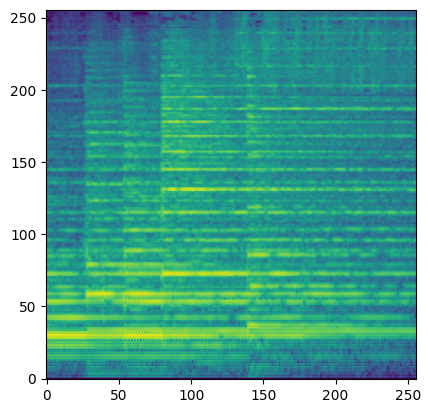

In [5]:
s_spec, s_maxi, s_mini = Preprocessing(s, 16000, resampler_f = False)
print(s_spec.shape)
plt.imshow(s_spec,origin='lower')

In [7]:
first_part = Reconstruction(f_spec, f_maxi, f_mini)
Audio(first_part.numpy(), rate = smpl_rt_reduce)

c:\Users\jpeir\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchaudio\functional\functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (256) may be set too high. Or, the value for `n_freqs` (513) may be set too low.
  warnings.warn(


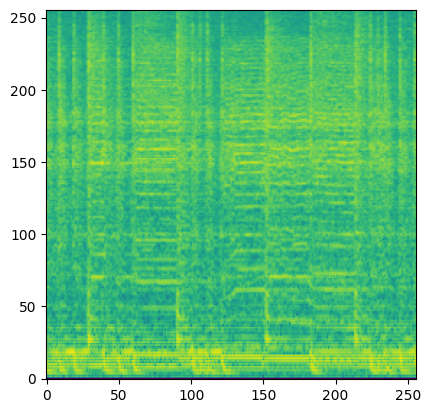

In [10]:
audio_path = "./PQMD/00a6f79ade0f483a963452eb9245df2d.wav"
waveform, samp_rt = torchaudio.load(audio_path)
spctr, mx, mn = Preprocessing(waveform, 48000)
plt.imshow(spctr,origin='lower')
plt.show()
audio_ref = Reconstruction(spctr, mx, mn)
Audio(audio_ref.numpy(), rate = smpl_rt_reduce)